In [1]:
#!pip install arcgis

In [29]:
import arcgis
import getpass
#username = input ("Username:")
#password = getpass.getpass ("Password:")
# gis = arcgis.gis.GIS("https://datalchemy.maps.arcgis.com", username, password)


In [ ]:
from arcgis.gis import GIS
# Create a GIS object, as an anonymous user for this example
gis = GIS()

In [2]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display

gis = GIS()

In [3]:
items = gis.content.search("Landsat 9 Views", item_type="Imagery Layer", max_items=4)

In [4]:

for item in items:
    display(item)


<Item title:"Pansharpened Landsat" type:Imagery Layer owner:esri>

<Item title:"Panchromatic Landsat" type:Imagery Layer owner:esri>

<Item title:"Urban Heat Island Severity for U.S. cities - 2019" type:Imagery Layer owner:TPL_GIS_Support>

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>

In [5]:
items

[<Item title:"Pansharpened Landsat" type:Imagery Layer owner:esri>,
 <Item title:"Panchromatic Landsat" type:Imagery Layer owner:esri>,
 <Item title:"Urban Heat Island Severity for U.S. cities - 2019" type:Imagery Layer owner:TPL_GIS_Support>,
 <Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>]

In [31]:
from arcgis.raster import ImageryLayer

In [32]:
img_svc_url = 'https://server6.tplgis.org/arcgis6/rest/services/heat_severity_2019/ImageServer'

In [33]:
landsat_urbanheat = ImageryLayer(img_svc_url)

In [34]:
img_svc_url ='https://landsat2.arcgis.com/arcgis/rest/services/Landsat/MS/ImageServer'

In [35]:
landsat_ms = ImageryLayer(img_svc_url)


In [10]:
landsat_ms.properties.name

'Landsat/MS'

In [11]:
landsat_ms.properties['description']

'Multispectral Landsat image service covering the landmass of the World. This service includes scenes from Landsat 8 and Global Land Survey (GLS) data from epochs 1990, 2000, 2005 and 2010 at 30 meter resolution as well as GLS 1975 at 60 meter resolution. GLS datasets are created by the United States Geological Survey (USGS) and the National Aeronautics and Space Administration (NASA) using Landsat images. This service can be used for mapping and change detection of urban growth, change of natural resources and comparing Landsat 8 imagery with GLS data.  Using on-the-fly processing, the raw DN values are transformed to scaled (0 - 10000) apparent reflectance values and then different service based renderings for band combinations and indices are applied. The band names are in line with Landsat 8 bands; GLS data band names are mapped along the same lines.'

In [12]:
landsat_ms.properties.capabilities

'Catalog,Image,Metadata'

In [13]:
landsat_ms.properties.allowedMosaicMethods

'ByAttribute,NorthWest,Center,LockRaster,Nadir,None'

In [14]:
{
  "rasterFunction": "Colormap",
  "rasterFunctionArguments": {
    "ColormapName": "Random"
  },
  "variableName": "Raster"
}

{'rasterFunction': 'Colormap',
 'rasterFunctionArguments': {'ColormapName': 'Random'},
 'variableName': 'Raster'}

In [15]:
for fn in landsat_ms.properties.rasterFunctionInfos:
    print(fn['name'])

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Geology with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Celsius
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Celsius
Band 11 Surface Temperature in Fahrenheit
None


In [16]:
map = gis.map("Chicago,Illinois", zoomlevel=13)
map

MapView(layout=Layout(height='400px', width='100%'))

In [17]:
map.add_layer(landsat_ms, {'renderer':'ClassedSizeRenderer','opacity':0.75})



In [18]:
import time
from arcgis.raster.functions import apply

for fn in landsat_ms.properties.rasterFunctionInfos:
    print(fn['name'])
    map.remove_layers()
    map.add_layer(apply(landsat_ms, fn['name']))
    time.sleep(2)

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Geology with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Celsius
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Celsius
Band 11 Surface Temperature in Fahrenheit
None


In [19]:
savi_map = gis.map("Chicago", zoomlevel=6)
savi_map

MapView(layout=Layout(height='400px', width='100%'))

In [20]:
from arcgis.raster.functions import savi

savi_map.add_layer(savi(landsat_ms, band_indexes="5 4 0.3"))

In [21]:
from arcgis.raster.functions import *

land_water = stretch(extract_band(landsat_ms, [4, 5, 3]),
                     stretch_type='PercentClip',
                     min_percent=2, 
                     max_percent=2,
                     dra=True, 
                     gamma=[1, 1, 1])

In [206]:
map2 = gis.map("Chicago", zoomlevel=13)
map2

MapView(layout=Layout(height='400px', width='100%'))

In [207]:
map.add_layer(landsat_urbanheat)

In [208]:
map2.add_layer(land_water)


In [209]:
for fn in landsat_urbanheat.properties.rasterFunctionInfos:
    print(fn['name'])

yellow2red.rft
None


In [210]:
yellow2red?

Object `yellow2red` not found.


In [211]:
from arcgis.raster.functions import *

land_water = stretch(extract_band(landsat_urbanheat, [4, 5, 3]),
                     stretch_type='PercentClip',
                     min_percent=2, 
                     max_percent=2,
                     dra=True, 
                     gamma=[1, 1, 1])

In [212]:
map2 = gis.map("Chicago", zoomlevel=13)
map2

MapView(layout=Layout(height='400px', width='100%'))

In [213]:

map2.add_layer(land_water)

In [214]:
# Establish a connection to your GIS.
from arcgis.gis import GIS
from IPython.display import display
gis = GIS() # anonymous connection to www.arcgis.com

In [215]:
from arcgis.features import FeatureLayerCollection

In [216]:
# Search for 'USA major cities' feature layer collection
search_results = gis.content.search('title: USA Major Cities',
                                    'Feature Layer')

# Access the first Item that's returned
major_cities_item = search_results[0]

major_cities_item

<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>

In [217]:
# connect to GIS
from arcgis.gis import GIS
gis = GIS()
ports_item = gis.content.get("b0cb0c9f63e74e8480af0286eb9ac01f")
ports_item

In [218]:
major_cities_layers = major_cities_item.layers
major_cities_layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Major_Cities/FeatureServer/0">]

In [219]:
feature_layer = major_cities_layers[0]
feature_layer

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Major_Cities/FeatureServer/0">

In [220]:
feature_layer.properties.extent

{
  "xmin": -17608123.3895845,
  "ymin": 2237818.89912024,
  "xmax": -7656889.54512499,
  "ymax": 9568526.08684907,
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  }
}

In [221]:
feature_layer.properties.capabilities

'Query'

In [222]:
feature_layer.properties.drawingInfo.renderer.type

'classBreaks'

In [223]:
for f in feature_layer.properties.fields:
    print(f['name'])

FID
NAME
CLASS
ST
STFIPS
PLACEFIPS
CAPITAL
POP_CLASS
POPULATION
POP2010
WHITE
BLACK
AMERI_ES
ASIAN
HAWN_PI
HISPANIC
OTHER
MULT_RACE
MALES
FEMALES
AGE_UNDER5
AGE_5_9
AGE_10_14
AGE_15_19
AGE_20_24
AGE_25_34
AGE_35_44
AGE_45_54
AGE_55_64
AGE_65_74
AGE_75_84
AGE_85_UP
MED_AGE
MED_AGE_M
MED_AGE_F
HOUSEHOLDS
AVE_HH_SZ
HSEHLD_1_M
HSEHLD_1_F
MARHH_CHD
MARHH_NO_C
MHH_CHILD
FHH_CHILD
FAMILIES
AVE_FAM_SZ
HSE_UNITS
VACANT
OWNER_OCC
RENTER_OCC


In [224]:
f

{
  "name": "RENTER_OCC",
  "type": "esriFieldTypeInteger",
  "actualType": "int",
  "alias": "RENTER_OCC",
  "sqlType": "sqlTypeInteger",
  "nullable": true,
  "editable": true,
  "domain": null,
  "defaultValue": null
}

In [63]:
for f in feature_layer.properties.fields:
    print(f['type'])

esriFieldTypeOID
esriFieldTypeString
esriFieldTypeString
esriFieldTypeString
esriFieldTypeString
esriFieldTypeString
esriFieldTypeString
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeDouble
esriFieldTypeDouble
esriFieldTypeDouble
esriFieldTypeInteger
esriFieldTypeDouble
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeDouble
esriFieldTypeInteger
esriFieldTypeInteger
esriFieldTypeInteger
esriFie

In [64]:
# Create a map widget
map = gis.map('los angeles') # Passing a place name to the constructor
                        # will initialize the extent of the map.
map

MapView(layout=Layout(height='400px', width='100%'))

In [225]:
map = gis.map("los angeles")
map.basemap = "satellite"
map.zoom = 10
map

MapView(layout=Layout(height='400px', width='100%'))

In [226]:
landsat_item = gis.content.search("Landsat Multispectral tags:'Landsat on AWS','landsat 9', 'Multispectral', 'Multitemporal', 'imagery', 'temporal', 'MS'", 'Imagery Layer', outside_org=True)[0]
print(landsat_item)

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>


In [227]:
map.add_layer(landsat_item)



In [228]:
map.time_slider

False

In [229]:
from datetime import datetime
map.time_slider = True
map.set_time_extent(start_time=datetime(2021, 12, 12), end_time=datetime(2022, 4, 12), interval=10, unit='days')

In [70]:
from arcgis.geometry import Point

pt = Point({"x" : 34.092809, "y" : -118.328661, 
            "spatialReference" : {"wkid" : 3309}})

In [71]:
map.draw(pt)

In [72]:
map.draw('polyline')



In [73]:
map.draw('polygon')

In [74]:
from arcgis.gis import GIS


In [75]:
gis = GIS()

In [230]:
map1 =gis.map("Chicago,Illinois")
map1

MapView(layout=Layout(height='400px', width='100%'))

In [77]:
#gis = GIS(username ='xxx', password='xxx')



In [78]:
map1 =gis.map("Chicago,Illinois")
map1

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"Greenways and Trails_WFL1" type:Feature Layer Collection owner:mmenninger_CMAPGIS>
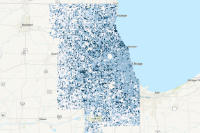

<Item title:"Chicago Off Street Bike Trails" type:Feature Layer Collection owner:sshah_chicago>
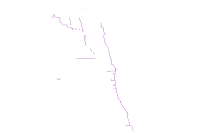

<Item title:"Major Regional Trails in the NWMC" type:Feature Layer Collection owner:nwmunicipalconference>
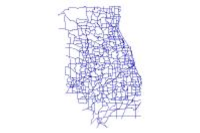

<Item title:"Bike Infrastructure_WFL1" type:Feature Layer Collection owner:EPedersen_CMAPGIS>
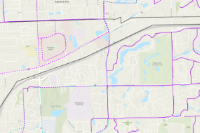

<Item title:"Chicago Trails CMAP" type:Feature Layer Collection owner:Jamie.Osborne_chicago>
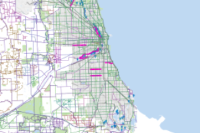

<Item title:"Bikeway Inventory System (BIS)" type:Feature Layer Collection owner:gispublisher_CMAPGIS>
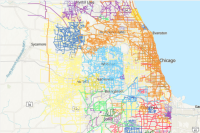

<Item title:"CSC_Chicago_Parks_Trails" type:Feature Layer Collection owner:nick.viau>
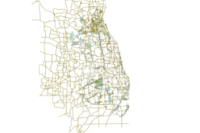

<Item title:"Bike Infrastructure_WFL1" type:Feature Layer Collection owner:EPedersen_CMAPGIS>
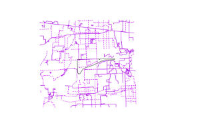

<Item title:"Muni_Chicago_2015_ExistingSignedBicycleRoutes" type:Feature Layer Collection owner:prittenhouse>
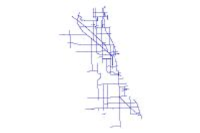

<Item title:"CMAP Trails Plan" type:Feature Layer Collection owner:Mapwurks1>
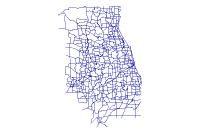

In [231]:
from IPython.display import display

items = gis.content.search('Chicago bike trails', item_type='feature layer')
for item in items:
    display(item)

In [232]:
items

[<Item title:"Greenways and Trails_WFL1" type:Feature Layer Collection owner:mmenninger_CMAPGIS>,
 <Item title:"Chicago Off Street Bike Trails" type:Feature Layer Collection owner:sshah_chicago>,
 <Item title:"Major Regional Trails in the NWMC" type:Feature Layer Collection owner:nwmunicipalconference>,
 <Item title:"Bike Infrastructure_WFL1" type:Feature Layer Collection owner:EPedersen_CMAPGIS>,
 <Item title:"Chicago Trails CMAP" type:Feature Layer Collection owner:Jamie.Osborne_chicago>,
 <Item title:"Bikeway Inventory System (BIS)" type:Feature Layer Collection owner:gispublisher_CMAPGIS>,
 <Item title:"CSC_Chicago_Parks_Trails" type:Feature Layer Collection owner:nick.viau>,
 <Item title:"Bike Infrastructure_WFL1" type:Feature Layer Collection owner:EPedersen_CMAPGIS>,
 <Item title:"Muni_Chicago_2015_ExistingSignedBicycleRoutes" type:Feature Layer Collection owner:prittenhouse>,
 <Item title:"CMAP Trails Plan" type:Feature Layer Collection owner:Mapwurks1>]

Chicago Metropolitan Agency for Planning

In [233]:
# filter out item with title 'Chicago Parks' to add
item_to_add = [temp_item for temp_item in items if 'CMAP' in temp_item.title]
item_to_add

[<Item title:"Chicago Trails CMAP" type:Feature Layer Collection owner:Jamie.Osborne_chicago>,
 <Item title:"CMAP Trails Plan" type:Feature Layer Collection owner:Mapwurks1>]

In [234]:
gis = GIS(api_key="yourkey",
              referer="https")

<Item title:"Copy of Scene of Southern and Eastern Moat System by MichaelTomiak_EMOWAA" type:Web Scene owner:Jan.Hubert_EMOWAA>
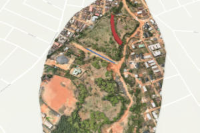

<Item title:"De_Zalmhaven_Rotterdam_City_Center" type:Web Scene owner:OksanaAminov>
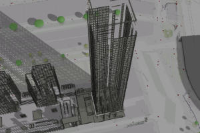

<Item title:"5.23 - Defa - Capital City 3D (Web 2.0) (prod)" type:Web Scene owner:sschweigert_Latitudegeo>
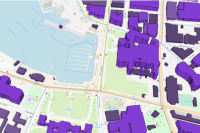

<Item title:"WorldPop EL" type:Web Scene owner:eric1258@esri.com_AFMIE>

<Item title:"WorldPop_SW" type:Web Scene owner:holistic_user07>

<Item title:"Kowloon City Buildings Zoning 3D with 2d zone" type:Web Scene owner:cyss_FoA_HKU>
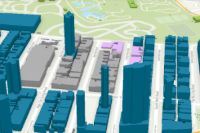

<Item title:"WorldPopwer" type:Web Scene owner:jonahdinoco>

<Item title:"WorldPop HOlJL update" type:Web Scene owner:jonahdinoco>

<Item title:"Ekwok City Tank Farm" type:Web Scene owner:TotalView>
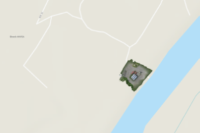

<Item title:"Increase Tree Canopy" type:Web Scene owner:Urban_Silvia>

<Item title:"WorldPop EAL2" type:Web Scene owner:elinz@esri.com_arcgisforintel>

<Item title:"De Zalmhaven Rotterdam JV" type:Web Scene owner:help@doar.com>
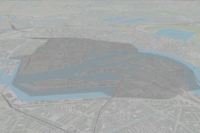

<Item title:"Portland Tree Coverage" type:Web Scene owner:birdcj_udel>
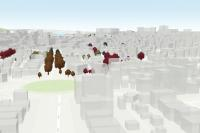

<Item title:"City of Taft" type:Web Scene owner:Taft_GIS>
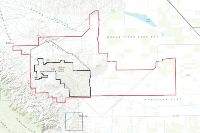

<Item title:"IU3D_Scan_Location_City_Pins_3D" type:Web Scene owner:klosteda_IU>
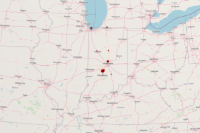

In [235]:
public_3d_city_scenes = gis.content.search(query="3d cities", item_type = "web scene",
                                           sort_field="numViews" ,sort_order="asc",
                                           max_items = 15, outside_org=True)
for item in public_3d_city_scenes:
    display(item)

In [236]:
gis = GIS.users

In [237]:
gis

In [238]:
gis = GIS.users
gis

In [239]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.raster.functions import *
from arcgis import geometry
import ipywidgets as widgets
    
import pandas as pd

# connect as an anonymous user
gis = GIS()

# search for the landsat multispectral imagery layer
landsat_item = gis.content.search("Landsat Multispectral tags:'Landsat on AWS','landsat 9', 'Multispectral', 'Multitemporal', 'imagery', 'temporal', 'MS'", 'Imagery Layer', outside_org=True)[0]
landsat = landsat_item.layers[0]
df = None


Setting an area of interest

In [240]:
from arcgis.raster.functions import apply

In [241]:
color_infrared = apply(landsat, 'Color Infrared with DRA')

In [242]:
m3 = gis.map('los angeles')
m3.add_layer(color_infrared)
m3

MapView(layout=Layout(height='400px', width='100%'))

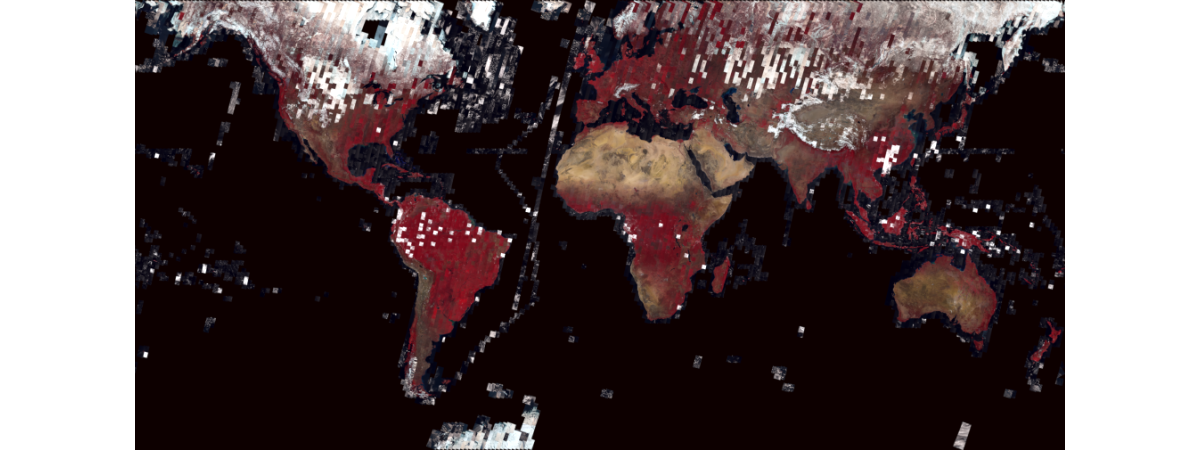

In [243]:
color_infrared

In [244]:
from arcgis.geocoding import geocode
area = geocode('los angeles', out_sr=landsat.properties.spatialReference)[0]

In [245]:
color_infrared.extent = area['extent']

Exporting Images from Imagery Layer

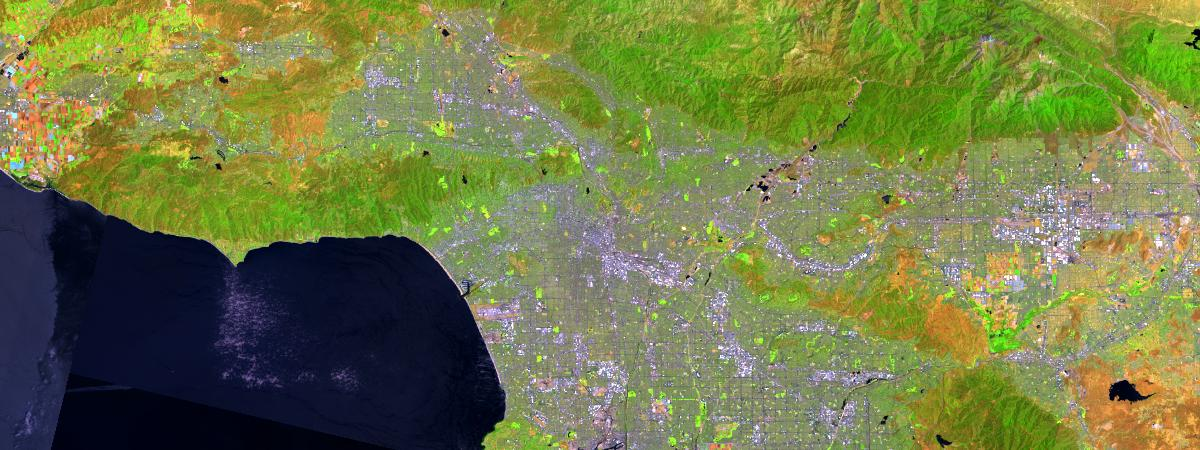

In [246]:
landsat.extent = area['extent']
landsat

In [247]:
from IPython.display import Image

In [248]:
img = landsat.export_image(bbox=area['extent'], size=[1200,450], f='image')

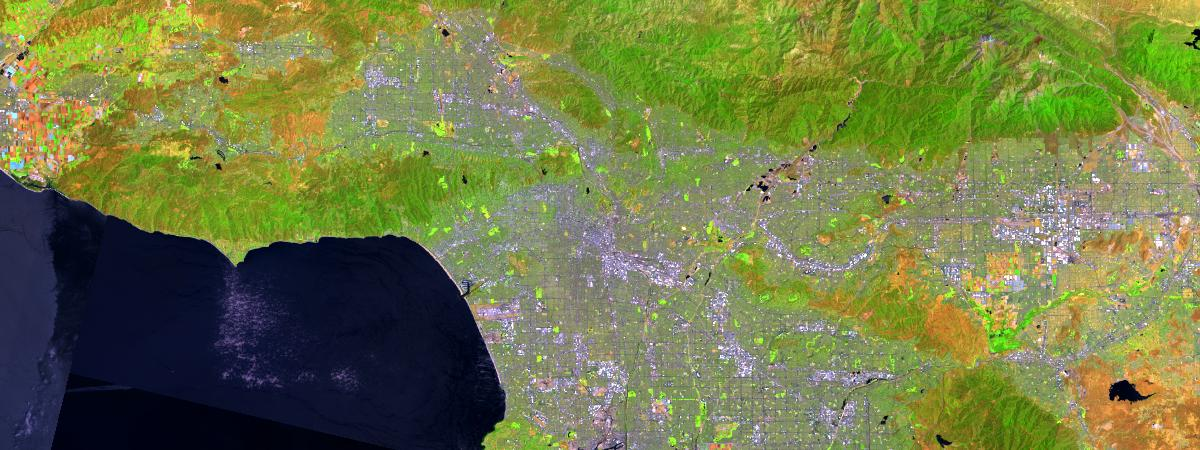

In [249]:
Image(img)

In [250]:
savedimg = landsat.export_image(bbox=area['extent'], size=[1200,450], f='image', save_folder='.', save_file='img.jpg')

In [99]:
savedimg


'.\\img.jpg'

In [100]:
from IPython.display import Image

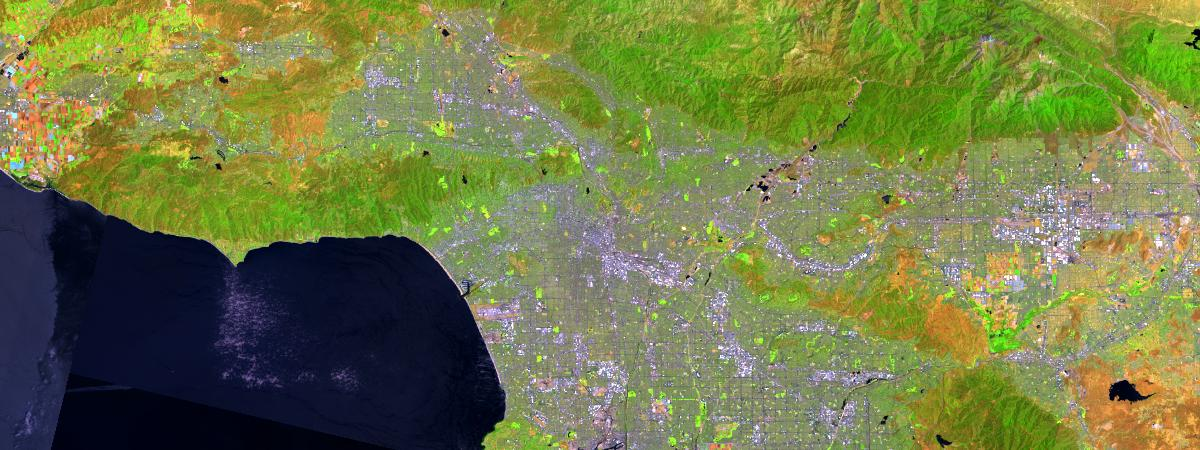

In [101]:
Image(filename=savedimg, width=1200, height=450)

In [102]:
from arcgis.raster.functions import stretch, extract_band

In [105]:
naturalcolor = stretch(extract_band(landsat, [3,2,1]), 
                    stretch_type='percentclip', min_percent=10, max_percent=10, gamma=[1, 1, 1], dra=True)

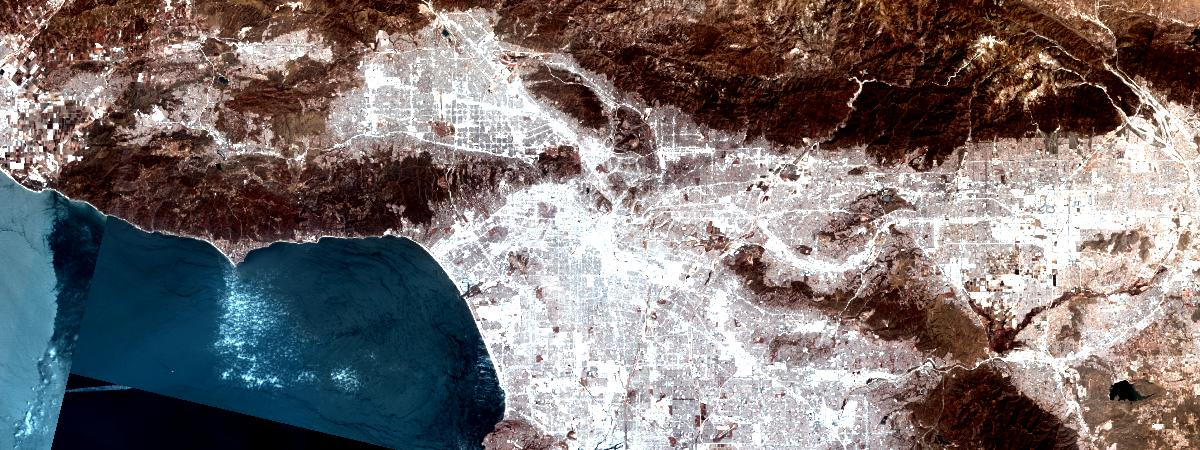

In [106]:
naturalcolor

In [107]:
from arcgis.features import *

In [108]:
landsat_item

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>

In [109]:
from arcgis.geometry import Geometry, buffer

code snippets with less cloud cover

In [110]:
selected = landsat.filter_by(where="(Category = 1) AND (CloudCover <=0.10) AND (WRS_Row = 36)", 
                   geometry=arcgis.geometry.filters.intersects(area['extent']))

In [111]:
fs = selected.query(out_fields="AcquisitionDate, GroupName, Best, CloudCover, WRS_Row, Month, Name", 
              return_geometry=True,
              return_distinct_values=False,
              order_by_fields="AcquisitionDate")

In [112]:
df = fs.sdf
df.head()

C:\tools\Python39\lib\site-packages\arcgis\features\geo\_io\serviceops.py:119: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[fld] = pd.to_datetime(


OBJECTID AcquisitionDate            GroupName      Best  CloudCover  \
0   3106827      1977-05-30  p043r036_2x19770530  95957036       -0.01   
1   3106857      1979-06-08  p044r036_2x19790608  95956036       -0.01   
2   3098905      1989-06-28  p041r036_5x19890628  91959036       -0.01   
3   3098872      1990-05-07  p040r036_5x19900507  91960036       -0.01   
4   3089612      2000-04-24  p040r036_7x20000424  88960036         0.0   

   WRS_Row  Month                         Name  \
0       36      5  p043r036_2dm19770530_z11_MS   
1       36      6  p044r036_2dm19790608_z11_MS   
2       36      6  p041r036_5dt19890628_z11_MS   
3       36      5  p040r036_5dt19900507_z11_MS   
4       36      4  p040r036_7dt20000424_z11_MS   

                                               SHAPE  
0  {"rings": [[[-12889114.8652, 4207339.365500003...  
1  {"rings": [[[-13049001.6684, 4177798.783399999...  
2  {"rings": [[[-13094672.6074, 4002345.807499997...  
3  {"rings": [[[-12902153.7239, 4064989.857699997...  
4  {"rings": [[[-12872961.873599999, 4197538.7916...

In [113]:
df = fs.sdf
df.tail()

C:\tools\Python39\lib\site-packages\arcgis\features\geo\_io\serviceops.py:119: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[fld] = pd.to_datetime(


OBJECTID     AcquisitionDate  \
250   4588224 2023-07-05 18:21:49   
251   4599861 2023-07-12 18:28:02   
252   4584079 2023-07-13 18:21:45   
253   4597184 2023-07-20 18:27:56   
254   4606567 2023-07-28 18:28:09   

                                        GroupName     Best  CloudCover  \
250  LC08_L1TP_040036_20230705_20230717_02_T1_MTL  1960036      0.0001   
251  LC08_L1TP_041036_20230712_20230724_02_T1_MTL   959036      0.0009   
252  LC09_L1TP_040036_20230713_20230713_02_T1_MTL   960036      0.0013   
253  LC09_L1TP_041036_20230720_20230720_02_T1_MTL  2959036      0.0333   
254  LC08_L1TP_041036_20230728_20230728_02_RT_MTL  4959036      0.0653   

     WRS_Row  Month                                      Name  \
250       36      7  LC08_L1TP_040036_20230705_20230717_02_T1   
251       36      7  LC08_L1TP_041036_20230712_20230724_02_T1   
252       36      7  LC09_L1TP_040036_20230713_20230713_02_T1   
253       36      7  LC09_L1TP_041036_20230720_20230720_02_T1   
254       36      7  LC08_L1TP_041036_20230728_20230728_02_RT   

                                                 SHAPE  
250  {"rings": [[[-12864648.618700001, 4198949.9443...  
251  {"rings": [[[-13036595.9936, 4199037.5603], [-...  
252  {"rings": [[[-12865856.536899999, 4198963.5125...  
253  {"rings": [[[-13035894.1581, 4198854.035499997...  
254  {"rings": [[[-13036592.4156, 4199064.641900003...

In [114]:
df.shape

(255, 9)

In [115]:
df['Time'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df['Time'].head(10)

0   1977-05-30
1   1979-06-08
2   1989-06-28
3   1990-05-07
4   2000-04-24
5   2000-05-01
6   2005-05-15
7   2005-05-24
8   2009-04-16
9   2009-05-11
Name: Time, dtype: datetime64[us]

In [116]:
m3 = gis.map('los angeles', 7)
display(m3)
m3.add_layer(selected.last())

MapView(layout=Layout(height='400px', width='100%'))

In [117]:
m3 = gis.map('los angeles', 7)
display(m3)
m3.add_layer(selected.first())

MapView(layout=Layout(height='400px', width='100%'))

In [118]:
old = landsat.filter_by('OBJECTID=3106827')

In [119]:
new = landsat.filter_by('OBJECTID=3558253')

In [120]:
from arcgis.raster.functions import *

In [251]:
diff = stretch(composite_band([ndvi(old, '5 4'),
                               ndvi(new, '5 4'),
                               ndvi(old, '5 4')]), 
                               stretch_type='stddev',  num_stddev=2.5, min=0, max=255, dra=True, astype='u8')
diff

Exception: Unable to complete operation.
Failed to open raster dataset [xcb083ff0_1a2b_43c6_96d6_d1436d334d7fy0.afr]
(Error Code: 400)

<ImageryLayer url:"https://landsat2.arcgis.com/arcgis/rest/services/Landsat/PS/ImageServer">

In [252]:
ndvi_diff = ndvi(new, '5 4') - ndvi(old, '5 4')

In [253]:
ndvi_diff

Exception: Invalid or missing input parameters.
(Error Code: 400)

<ImageryLayer url:"https://landsat2.arcgis.com/arcgis/rest/services/Landsat/PS/ImageServer">

In [124]:
threshold_val = 0.1

In [125]:
masked = colormap(remap(ndvi_diff, 
                        input_ranges=[threshold_val, 1], 
                        output_values=[1], 
                        no_data_ranges=[-1, threshold_val], astype='u8'), 
                  colormap=[[1, 124, 252, 0]], astype='u8')

Image(masked.export_image(bbox=area['extent'], size=[1200,450], f='image'))

Exception: Invalid or missing input parameters.
Failed to open raster dataset [x4d9c3390_5276_4e53_a751_9b8e2caf8ed4y0.afr]
(Error Code: 400)

In [126]:
m = gis.map('los angeles')
m

MapView(layout=Layout(height='400px', width='100%'))

In [127]:

m.add_layer(diff)

Exception: Unable to complete operation.
Failed to open raster dataset [x6eede780_e07b_45aa_a9af_718276cb7e06y0.afr]
(Error Code: 400)

In [128]:

m.add_layer(masked)


Exception: Invalid or missing input parameters.
Failed to open raster dataset [x38b82abb_fee3_4e30_ac67_f46b66bfea45y0.afr]
(Error Code: 400)

BAck to old section

In [129]:
from IPython.display import HTML
HTML(landsat_item.description)

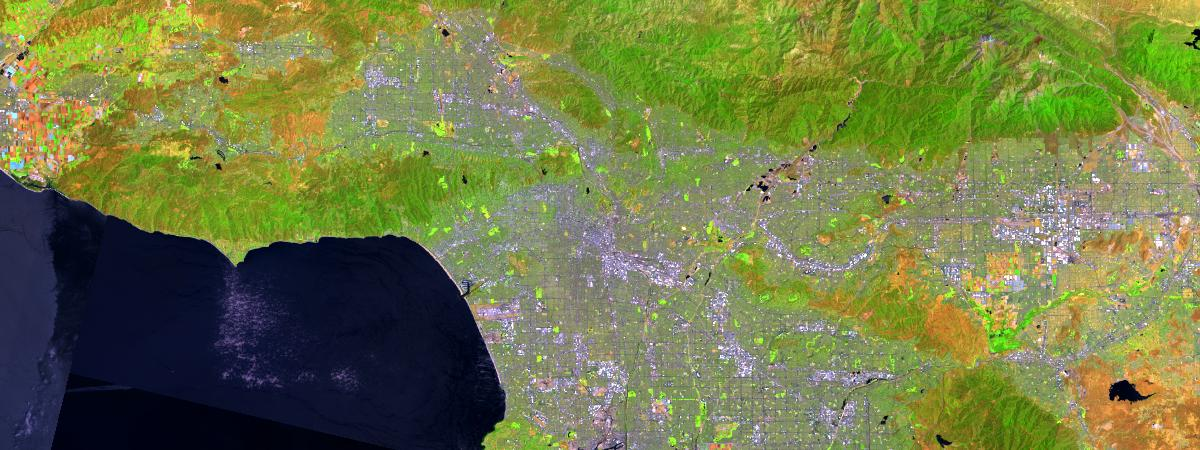

In [130]:
landsat = landsat_item.layers[0]
landsat

In [131]:
import pandas as pd

In [132]:
pd.DataFrame(landsat.key_properties()['BandProperties'])

BandName WavelengthMin WavelengthMax
0        CoastalAerosol        430.00        450.00
1                  Blue        450.00        510.00
2                 Green        530.00        590.00
3                   Red        640.00        670.00
4          NearInfrared        850.00        880.00
5   ShortWaveInfrared_1       1570.00       1650.00
6   ShortWaveInfrared_2       2110.00       2290.00
7                Cirrus       1360.00       1380.00
8                    QA          0.00          0.00
9      ThermalInfrared1      10600.00      11190.00
10     ThermalInfrared2      11500.00      12150.00

In [133]:
m = gis.map('los angeles')
m

MapView(layout=Layout(height='400px', width='100%'))

In [134]:
m.add_layer(landsat)

In [135]:
for rasterfunc in landsat.properties.rasterFunctionInfos:
    print(rasterfunc.name)

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Geology with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Celsius
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Celsius
Band 11 Surface Temperature in Fahrenheit
None


In [136]:
from arcgis.raster.functions import apply

In [137]:
color_infrared = apply(landsat, 'Color Infrared with DRA')


In [138]:

m = gis.map('los angeles')
m.add_layer(color_infrared)
m

MapView(layout=Layout(height='400px', width='100%'))

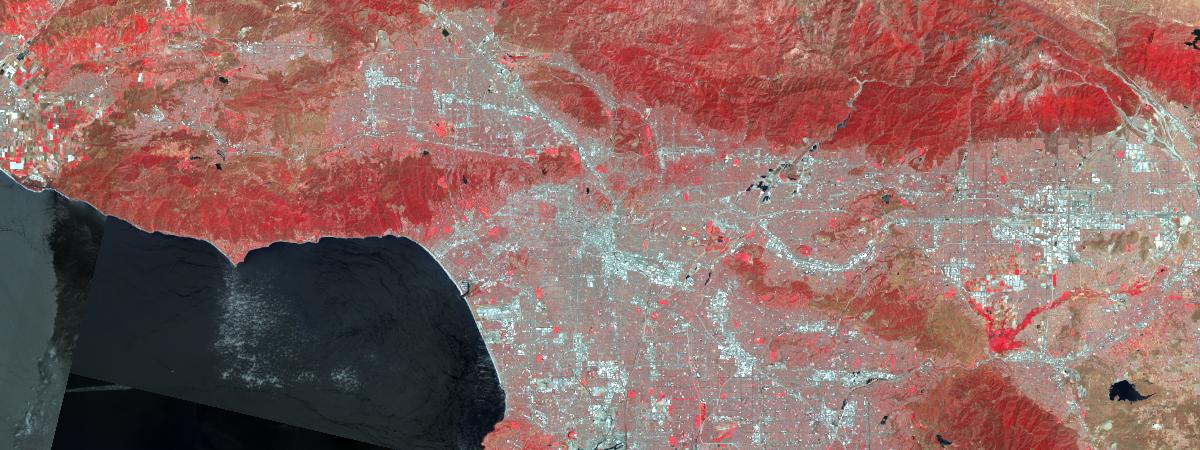

In [139]:
color_infrared

In [140]:
from arcgis.geocoding import geocode
area = geocode('los angeles', out_sr=landsat.properties.spatialReference)[0]

In [141]:
color_infrared.extent = area['extent']

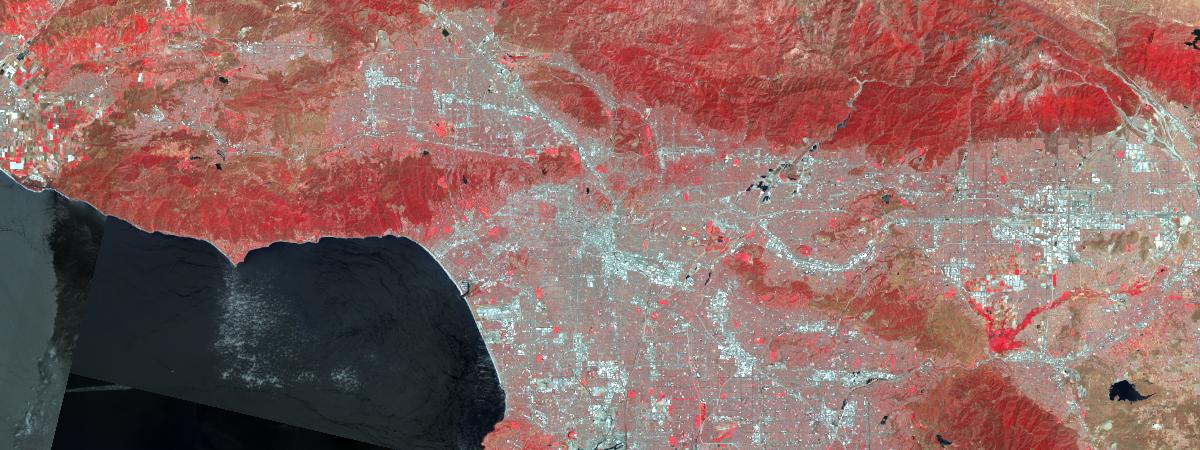

In [142]:
color_infrared

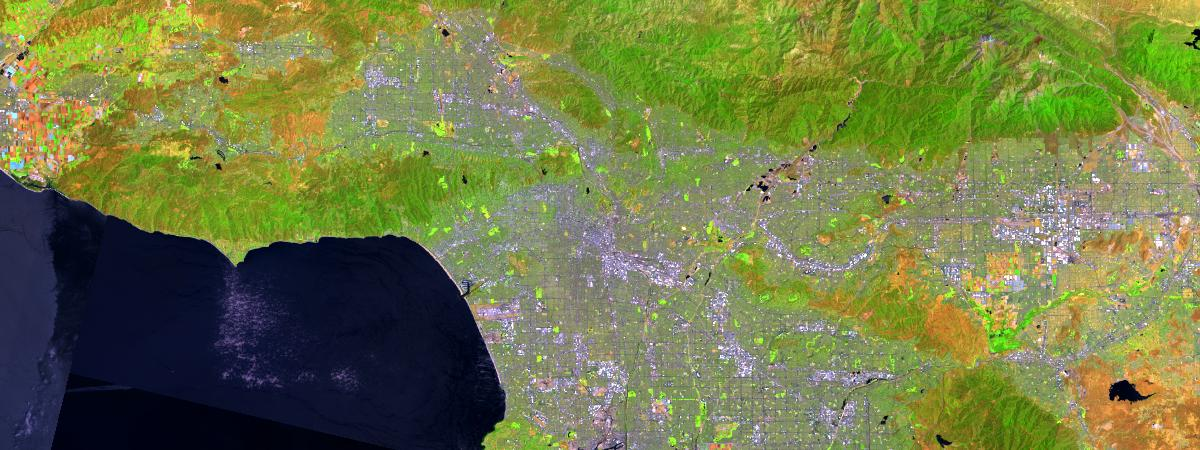

In [143]:
landsat.extent = area['extent']
landsat

Exporting Images from Imagery Layer

In [144]:
from IPython.display import Image

In [145]:

img = landsat.export_image(bbox=area['extent'], size=[1200,450], f='image')

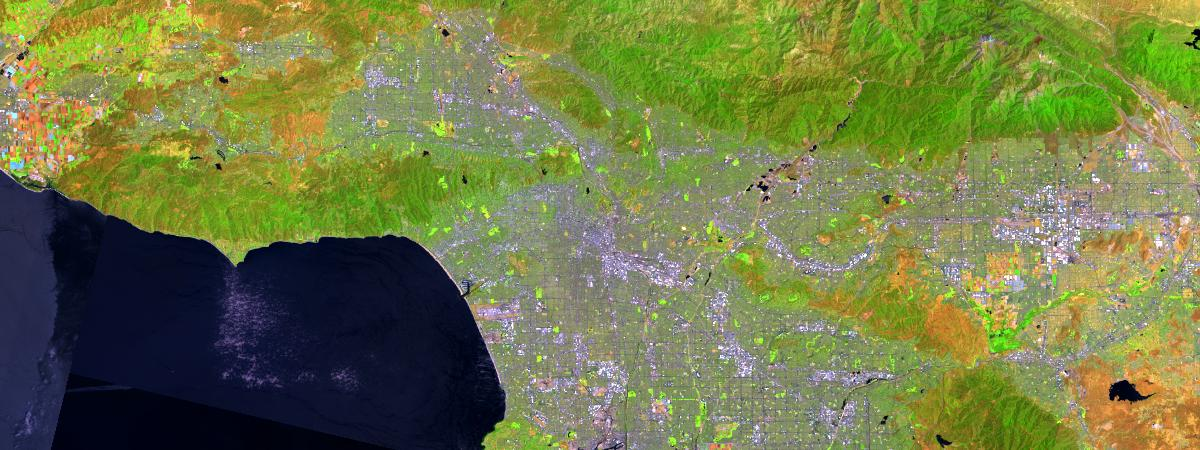

In [146]:
Image(img)

In [147]:
savedimg = landsat.export_image(bbox=area['extent'], size=[1200,450], f='image', save_folder='.', save_file='img.jpg')

In [148]:
savedimg


'.\\img.jpg'

In [149]:
from IPython.display import Image

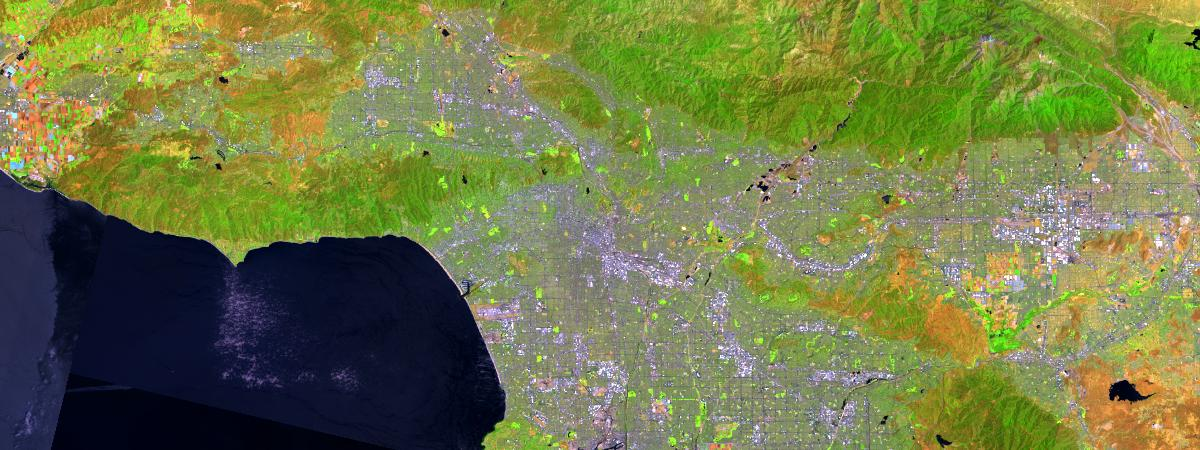

In [150]:
Image(filename=savedimg, width=1200, height=450)

Exporting images from an imagery layer to which a raster function has been applied

In [151]:
color_infrared = apply(landsat, 'Color Infrared with DRA')

In [152]:

img = color_infrared.export_image(bbox=area['extent'], size=[1200, 450], f='image')

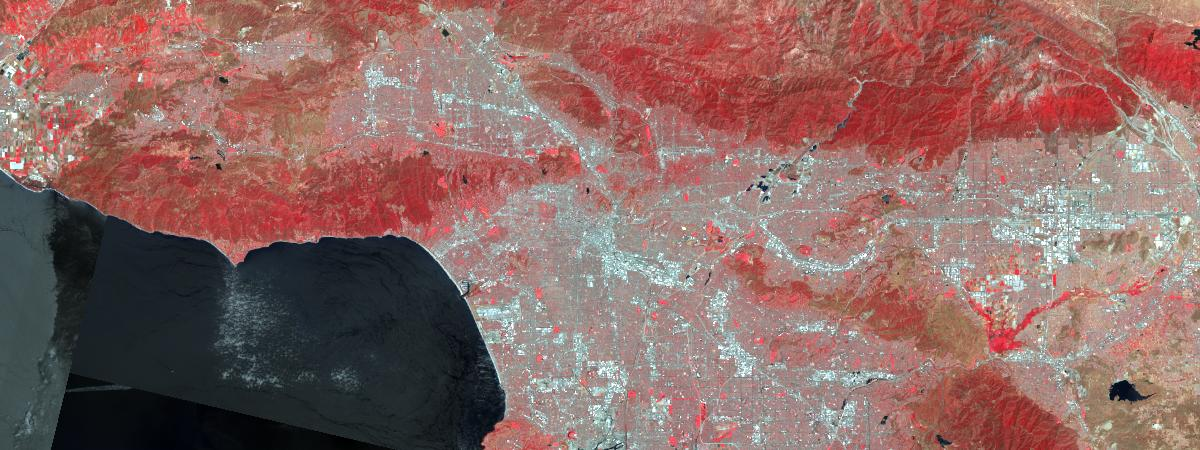

In [153]:

Image(img)

Vegetation Index
An index combines two or more wavelengths to indicate the relative abundance of different land cover features, like vegetation or moisture.

Let's use the 'NDVI Colorized' raster function to visualize healthy, green vegetation:

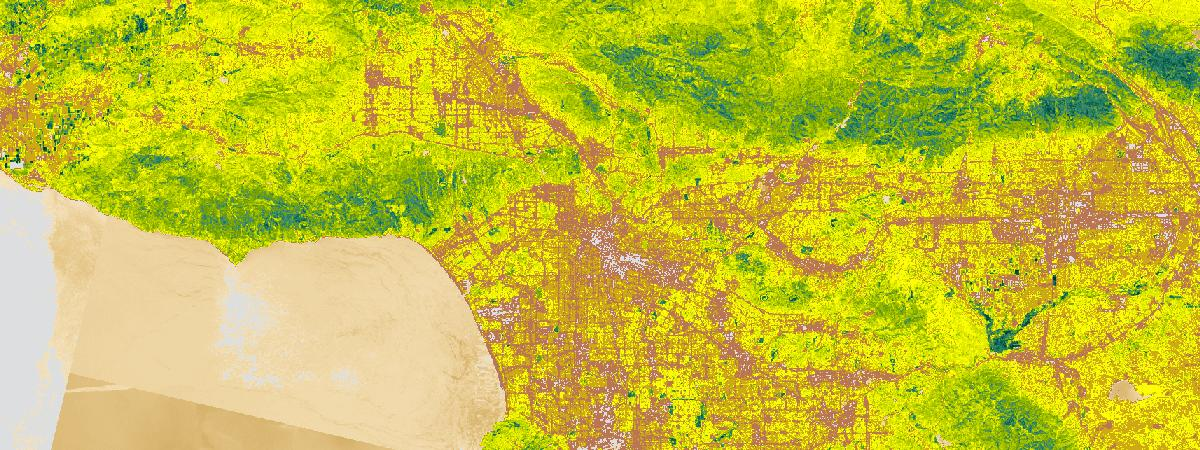

In [154]:
ndvi_colorized = apply(landsat, 'NDVI Colorized')
ndvi_colorized

Custom Bands
You can also create your own indexes and band combinations, as well as specify stretch and gamma values to adjust the image contrast.

The code below first extracts the [3 (Red), 2 (Green), 1 (Blue)] bands using the extract_bands function and passes it's output to the stretch function to enhance the image:

In [155]:

from arcgis.raster.functions import stretch, extract_band


In [160]:
naturalcolor = stretch(extract_band(landsat, [3,2,1]), 
                    stretch_type='percentclip', min_percent=10, max_percent=10, gamma=[1, 1, 1], dra=True)

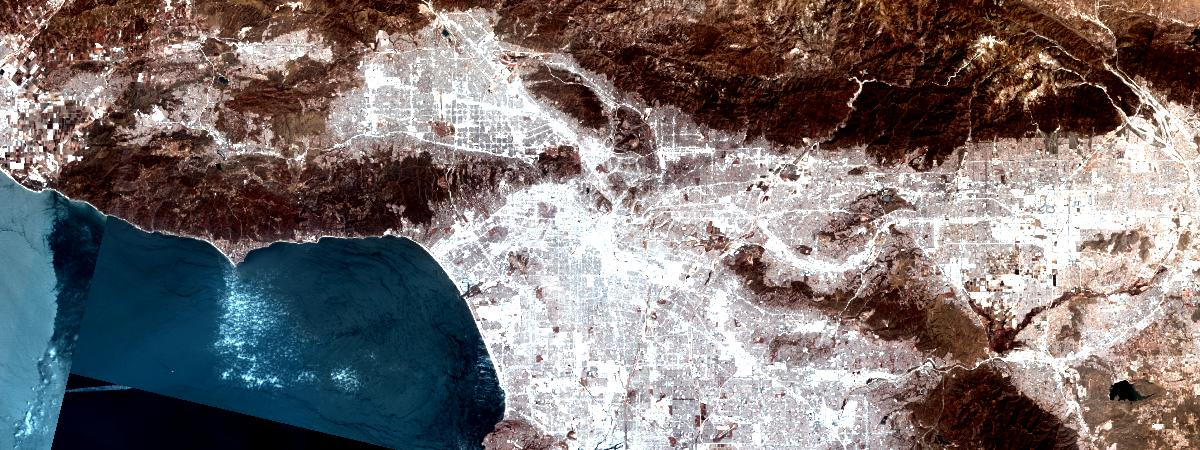

In [161]:
naturalcolor

In [162]:
import arcgis
g = arcgis.geometry.Geometry(area['extent'])

In [163]:
samples = landsat.get_samples(g, sample_count=50,
                                 out_fields='AcquisitionDate,OBJECTID,GroupName,Category,SunAzimuth,SunElevation,CloudCover')

In [164]:
samples[10]


{'location': {'x': -13170152.659687646,
  'y': 4049805.1295561446,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}},
 'locationId': 14,
 'value': '1649 1553 1602 1916 3070 3493 2426 8 21824 32568 28339',
 'rasterId': 4599861,
 'resolution': 30,
 'attributes': {'AcquisitionDate': 1689186482000,
  'OBJECTID': 4599861,
  'GroupName': 'LC08_L1TP_041036_20230712_20230724_02_T1_MTL',
  'Category': 1,
  'SunAzimuth': 116.50965881,
  'SunElevation': 66.39580536,
  'CloudCover': 0.0009},
 'values': [1649.0,
  1553.0,
  1602.0,
  1916.0,
  3070.0,
  3493.0,
  2426.0,
  8.0,
  21824.0,
  32568.0,
  28339.0]}

In [165]:
import datetime
value = samples[0]['attributes']['AcquisitionDate']
datetime.datetime.fromtimestamp(value /1000).strftime("Acquisition Date: %d %b, %Y")

'Acquisition Date: 13 Jul, 2023'

In [166]:
pd.DataFrame(samples[0]['attributes'], index=[0])

AcquisitionDate  OBJECTID                                     GroupName  \
0    1689186482000   4599861  LC08_L1TP_041036_20230712_20230724_02_T1_MTL   

   Category  SunAzimuth  SunElevation  CloudCover  
0         1  116.509659     66.395805      0.0009

Spectral profile from the sampled values at a location

In [167]:
m = gis.map('los angeles')
m

MapView(layout=Layout(height='400px', width='100%'))

In [168]:
m.add_layer(landsat)

In [169]:
from arcgis.gis import GIS
gis=GIS()

In [170]:
landsat_item = gis.content.search('Multispectral Landsat', 'Imagery Layer', outside_org=True)[0]

In [171]:
m = gis.map('los angeles')
m

MapView(layout=Layout(height='400px', width='100%'))

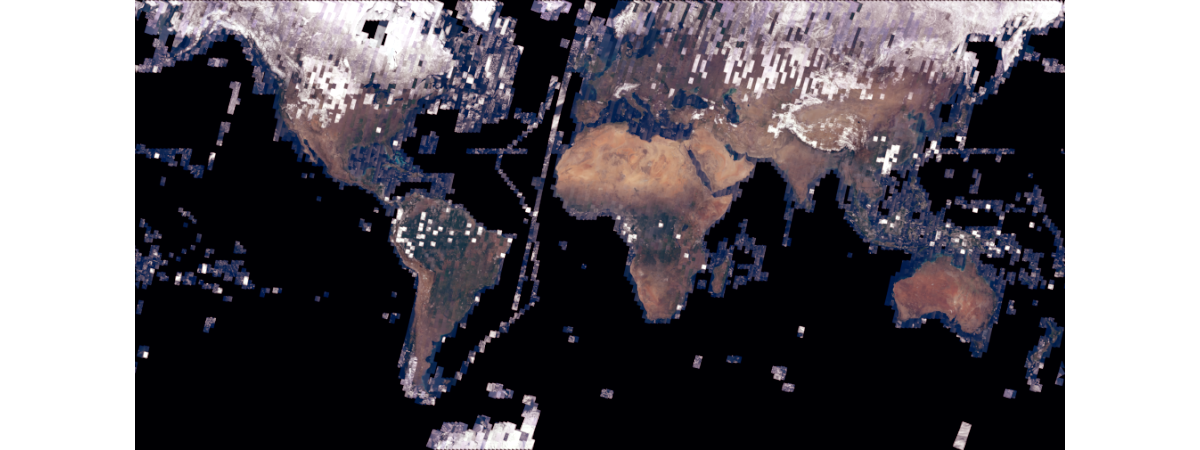

In [175]:
landsat = landsat_item.layers[0]
landsat

In [176]:
m.add_layer(landsat)

In [177]:
from bokeh.models import Range1d
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
output_notebook()

def get_samples(mw, g):
    clear_output()
    m.draw(g)
    samples = landsat.get_samples(g, pixel_size=30)
    values = samples[0]['value']
    vals = [float(int(s)/100000) for s in values.split(' ')]
    
    x = ['1','2', '3','4','5','6','7','8']
    y = vals
    p = figure(title="Spectral Profile", x_axis_label='Spectral Bands', y_axis_label='Data Values', width=600, height=300)
    p.line(x, y, legend_label="Selected Point", line_color="red", line_width=2)
    p.circle(x, y, line_color="red", fill_color="white", size=8)
    p.y_range=Range1d(0, 1.0)

    show(p)
    
print('Click anywhere on the map to plot the spectral profile for that location.')
m.on_click(get_samples)


Loading BokehJS ...

Click anywhere on the map to plot the spectral profile for that location.


<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>
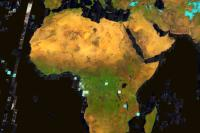

In [178]:
items = gis.content.search("title: Multispectral Landsat", item_type="Imagery Layer",  outside_org=True)
items[0]

In [179]:
l9_lyr = items[0].layers[0]


In [180]:
land_water_lr = stretch(extract_band(l9_lyr, [4, 5, 3]),
                        stretch_type='PercentClip',
                        min_percent=2, 
                        max_percent=2,
                        dra=True, 
                        gamma=[1, 1, 1])

In [181]:
landmap = gis.map('los angeles')
landmap

MapView(layout=Layout(height='400px', width='100%'))

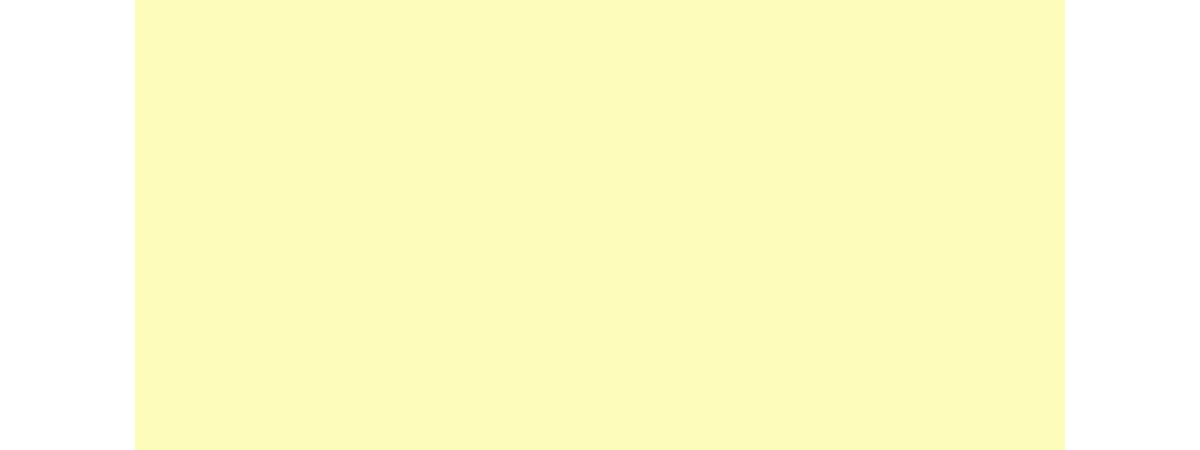

In [182]:
ndvi_colorized = apply(landmap, 'NDVI Colorized')
ndvi_colorized

In [183]:
landmap.add_layer(land_water_lr)


In [184]:
!pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00


In [185]:
import graphviz

In [186]:
land_water_lr.draw_graph()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [187]:
from arcgis.geocoding import geocode

# get spatial extent of los angeles
area = geocode('los angeles', out_sr=l9_lyr.properties.spatialReference)[0]
area['extent']

{'xmin': -13194971.976479154,
 'ymin': 3997500.9822409223,
 'xmax': -13131074.588763814,
 'ymax': 4074624.4463476525}

In [188]:
import pandas as pd
from datetime import datetime

selected = l9_lyr.filter_by(time=[datetime(2019, 1, 1), datetime(2022, 1, 1)],
                             geometry=arcgis.geometry.filters.intersects(area['extent']))

df = selected.query(out_fields="AcquisitionDate, GroupName, CloudCover", 
                    order_by_fields="AcquisitionDate").sdf
df.head(50)

C:\tools\Python39\lib\site-packages\arcgis\features\geo\_io\serviceops.py:119: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[fld] = pd.to_datetime(


OBJECTID     AcquisitionDate  \
0    4474391 2019-01-05 05:42:06   
1    4474593 2019-01-05 05:42:30   
2     610881 2019-01-06 18:28:12   
3     610904 2019-01-06 18:28:36   
4     878713 2019-01-15 18:22:23   
5    4474392 2019-01-21 05:42:03   
6    4474594 2019-01-21 05:42:27   
7     610882 2019-01-22 18:28:08   
8     610905 2019-01-22 18:28:32   
9     878714 2019-01-31 18:22:19   
10   4474393 2019-02-06 05:42:00   
11   4474595 2019-02-06 05:42:24   
12    610883 2019-02-07 18:28:06   
13    610906 2019-02-07 18:28:30   
14    878715 2019-02-16 18:22:17   
15   4474394 2019-02-22 05:41:57   
16   4474596 2019-02-22 05:42:21   
17    610884 2019-02-23 18:28:03   
18    610907 2019-02-23 18:28:27   
19    878716 2019-03-04 18:22:13   
20   4474395 2019-03-10 05:41:52   
21   4474597 2019-03-10 05:42:16   
22    610885 2019-03-11 18:27:57   
23    610051 2019-03-11 18:28:21   
24    878717 2019-03-20 18:22:08   
25   4474396 2019-03-26 05:41:48   
26   4474598 2019-03-26 05:42:12   
27    610886 2019-03-27 18:27:54   
28    610908 2019-03-27 18:28:18   
29    878695 2019-04-05 18:21:41   
30    878718 2019-04-05 18:22:04   
31   4474397 2019-04-11 05:41:44   
32   4474599 2019-04-11 05:42:08   
33    610887 2019-04-12 18:27:49   
34    610909 2019-04-12 18:28:13   
35   4472632 2019-04-20 05:35:53   
36    878696 2019-04-21 18:21:34   
37    878719 2019-04-21 18:21:58   
38   4474398 2019-04-27 05:41:38   
39   4474600 2019-04-27 05:42:02   
40    610888 2019-04-28 18:27:44   
41    610910 2019-04-28 18:28:08   
42   4472633 2019-05-06 05:35:56   
43    878720 2019-05-07 18:22:02   
44   4474399 2019-05-13 05:41:47   
45   4474601 2019-05-13 05:42:11   
46    610889 2019-05-14 18:27:54   
47    610911 2019-05-14 18:28:18   
48   3022099 2019-05-20 06:49:11   
49   3022275 2019-05-20 06:49:11   

                                       GroupName  CloudCover  \
0   LC08_L1GT_139207_20190105_20200830_02_T2_MTL        -1.0   
1   LC08_L1GT_139208_20190105_20200829_02_T2_MTL        -1.0   
2   LC08_L1TP_041036_20190106_20200830_02_T1_MTL       0.206   
3   LC08_L1TP_041037_20190106_20200829_02_T1_MTL      0.0823   
4   LC08_L1TP_040037_20190115_20200830_02_T1_MTL      0.9256   
5   LC08_L1GT_139207_20190121_20200829_02_T2_MTL        -1.0   
6   LC08_L1GT_139208_20190121_20200829_02_T2_MTL        -1.0   
7   LC08_L1TP_041036_20190122_20200830_02_T1_MTL      0.0124   
8   LC08_L1TP_041037_20190122_20200829_02_T1_MTL      0.0007   
9   LC08_L1TP_040037_20190131_20200829_02_T1_MTL      0.5724   
10  LC08_L1GT_139207_20190206_20200829_02_T2_MTL        -1.0   
11  LC08_L1GT_139208_20190206_20200829_02_T2_MTL        -1.0   
12  LC08_L1TP_041036_20190207_20200829_02_T1_MTL      0.0174   
13  LC08_L1TP_041037_20190207_20200829_02_T1_MTL      0.0278   
14  LC08_L1TP_040037_20190216_20200829_02_T1_MTL      0.1136   
15  LC08_L1GT_139207_20190222_20200829_02_T2_MTL        -1.0   
16  LC08_L1GT_139208_20190222_20200829_02_T2_MTL        -1.0   
17  LC08_L1TP_041036_20190223_20200829_02_T1_MTL      0.0424   
18  LC08_L1TP_041037_20190223_20200829_02_T1_MTL      0.0015   
19  LC08_L1TP_040037_20190304_20200829_02_T1_MTL      0.7351   
20  LC08_L1GT_139207_20190310_20200829_02_T2_MTL        -1.0   
21  LC08_L1GT_139208_20190310_20200829_02_T2_MTL        -1.0   
22  LC08_L1TP_041036_20190311_20200829_02_T1_MTL      0.7843   
23  LC08_L1GT_041037_20190311_20200829_02_T2_MTL      0.9977   
24  LC08_L1TP_040037_20190320_20200829_02_T1_MTL      0.7463   
25  LC08_L1GT_139207_20190326_20200829_02_T2_MTL        -1.0   
26  LC08_L1GT_139208_20190326_20200829_02_T2_MTL        -1.0   
27  LC08_L1TP_041036_20190327_20200829_02_T1_MTL      0.3073   
28  LC08_L1TP_041037_20190327_20200829_02_T1_MTL      0.5716   
29  LC08_L1TP_040036_20190405_20200829_02_T1_MTL      0.2073   
30  LC08_L1TP_040037_20190405_20200829_02_T1_MTL      0.6574   
31  LC08_L1GT_139207_20190411_20200828_02_T2_MTL        -1.0   
32  LC08_L1GT_139208_20190411_20200829_02_T2_MTL       

In [189]:
import pandas as pd
from datetime import datetime

selected = l9_lyr.filter_by(time=[datetime(2019, 1, 1), datetime(2022, 1, 1)],
                             geometry=arcgis.geometry.filters.intersects(area['extent']))

df = selected.query(out_fields="AcquisitionDate, GroupName, CloudCover", 
                    order_by_fields="AcquisitionDate").sdf
df.tail(50)

C:\tools\Python39\lib\site-packages\arcgis\features\geo\_io\serviceops.py:119: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[fld] = pd.to_datetime(


OBJECTID     AcquisitionDate  \
388   3262235 2021-10-19 18:22:35   
389   3262236 2021-10-19 18:22:59   
390   4474454 2021-10-25 05:42:40   
391   4474656 2021-10-25 05:43:04   
392   3274998 2021-10-26 18:28:46   
393   3274999 2021-10-26 18:29:10   
394   4472690 2021-11-03 05:36:53   
395   3385302 2021-11-04 18:22:34   
396   3385308 2021-11-04 18:22:58   
397   4474455 2021-11-10 05:42:37   
398   4474657 2021-11-10 05:43:01   
399   3385406 2021-11-11 18:28:43   
400   3385411 2021-11-11 18:29:06   
401   4511265 2021-11-17 05:40:58   
402   4511329 2021-11-17 05:41:22   
403   4476095 2021-11-17 05:48:43   
404   4476097 2021-11-17 05:49:07   
405   4415048 2021-11-18 18:22:34   
406   4472691 2021-11-19 05:36:47   
407   3385309 2021-11-20 18:22:53   
408   4511267 2021-11-22 05:43:26   
409   4408405 2021-11-23 18:24:38   
410   4408406 2021-11-23 18:25:01   
411   4474456 2021-11-26 05:42:36   
412   4474658 2021-11-26 05:43:00   
413   3385407 2021-11-27 18:28:42   
414   3385412 2021-11-27 18:29:05   
415   4511269 2021-12-04 05:42:39   
416   4472692 2021-12-05 05:36:49   
417   4408429 2021-12-05 18:28:44   
418   4408430 2021-12-05 18:29:08   
419   3385304 2021-12-06 18:22:31   
420   3385310 2021-12-06 18:22:55   
421   4474457 2021-12-12 05:42:35   
422   4474659 2021-12-12 05:42:59   
423   3385408 2021-12-13 18:28:41   
424   3371245 2021-12-13 18:29:05   
425   4402154 2021-12-14 18:22:27   
426   4400485 2021-12-14 18:22:51   
427   4511271 2021-12-20 05:42:31   
428   4472693 2021-12-21 05:36:47   
429   4402174 2021-12-21 18:28:37   
430   4400492 2021-12-21 18:29:01   
431   3385311 2021-12-22 18:22:52   
432   4474458 2021-12-28 05:42:30   
433   4474660 2021-12-28 05:42:54   
434   3385409 2021-12-29 18:28:35   
435   3385413 2021-12-29 18:28:59   
436   4395979 2021-12-30 18:22:27   
437   4395980 2021-12-30 18:22:50   

                                        GroupName  CloudCover  \
388  LC08_L1TP_040036_20211019_20211026_02_T1_MTL      0.0009   
389  LC08_L1TP_040037_20211019_20211026_02_T1_MTL      0.0038   
390  LC08_L1GT_139207_20211025_20211102_02_T2_MTL        -1.0   
391  LC08_L1GT_139208_20211025_20211102_02_T2_MTL        -1.0   
392  LC08_L1TP_041036_20211026_20211104_02_T1_MTL      0.1008   
393  LC08_L1TP_041037_20211026_20211104_02_T1_MTL      0.0172   
394  LC08_L1GT_138208_20211103_20211109_02_T2_MTL        -1.0   
395  LC08_L1TP_040036_20211104_20211116_02_T1_MTL      0.0017   
396  LC08_L1TP_040037_20211104_20211116_02_T1_MTL      0.3259   
397  LC08_L1GT_139207_20211110_20211116_02_T2_MTL        -1.0   
398  LC08_L1GT_139208_20211110_20211116_02_T2_MTL        -1.0   
399  LC08_L1TP_041036_20211111_20211117_02_T1_MTL      0.0887   
400  LC08_L1TP_041037_20211111_20211117_02_T1_MTL      0.0008   
401  LC09_L1GT_139207_20211117_20230506_02_T2_MTL        -1.0   
402  LC09_L1GT_139208_20211117_20230506_02_T2_MTL        -1.0   
403  LC08_L1GT_140207_20211117_20211124_02_T2_MTL        -1.0   
404  LC08_L1GT_140208_20211117_20211124_02_T2_MTL        -1.0   
405  LC09_L1TP_040037_20211118_20230506_02_T1_MTL      0.4033   
406  LC08_L1GT_138208_20211119_20211124_02_T2_MTL        -1.0   
407  LC08_L1TP_040037_20211120_20211130_02_T1_MTL      0.3546   
408  LC09_L1GT_139207_20211122_20230505_02_T2_MTL        -1.0   
409  LC09_L1TP_040036_20211123_20230505_02_T1_MTL      0.0633   
410  LC09_L1TP_040037_20211123_20230505_02_T1_MTL      0.2863   
411  LC08_L1GT_139207_20211126_20211130_02_T2_MTL        -1.0   
412  LC08_L1GT_139208_20211126_20211130_02_T2_MTL        -1.0   
413  LC08_L1TP_041036_20211127_20211208_02_T1_MTL      0.0227   
414  LC08_L1TP_041037_20211127_20211208_02_T1_MTL      0.0444   
415  LC09_L1GT_139207_20211204_20230505_02_T2_MTL        -1.0   
416  LC08_L1GT_138208_20211205_20211214_02_T2_MTL        -1.0   
417  LC09_L1TP_041036_20211205_20230505_02_T1_MTL      0.2109   
418  LC09_L1TP_041037_20211205_20230505_02_T1_MTL      0.2557   
419  LC08_L1TP_040036_20211206_202112

In [190]:
df.shape

(438, 5)

In [191]:
df['Time'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df['Time'].head(10)

0   2019-01-05 05:42:06
1   2019-01-05 05:42:30
2   2019-01-06 18:28:12
3   2019-01-06 18:28:36
4   2019-01-15 18:22:23
5   2019-01-21 05:42:03
6   2019-01-21 05:42:27
7   2019-01-22 18:28:08
8   2019-01-22 18:28:32
9   2019-01-31 18:22:19
Name: Time, dtype: datetime64[us]

In [192]:
m = gis.map('Los Angeles', 15)
display(m)
m.add_layer(selected.last())

MapView(layout=Layout(height='400px', width='100%'))

In [194]:
m = gis.map('Los Angeles', 15)
display(m)
m.add_layer(selected.first())

MapView(layout=Layout(height='400px', width='100%'))

In [195]:
old = landsat.filter_by('OBJECTID=610881')

In [196]:
new = landsat.filter_by('OBJECTID=3434313')

In [197]:
from arcgis.raster.functions import *


In [198]:
diff = stretch(composite_band([ndvi(old, '5 4'),
                               ndvi(new, '5 4'),
                               ndvi(old, '5 4')]), 
                               stretch_type='stddev',  num_stddev=2.5, min=0, max=200, dra=True, astype='u8')
diff

Exception: Unable to complete operation.
Failed to open raster dataset [x8b3c7b53_3732_4c82_980d_0d969f6e8b16y0.afr]
(Error Code: 400)

<ImageryLayer url:"https://landsat2.arcgis.com/arcgis/rest/services/Landsat/PS/ImageServer">

In [199]:
ndvi_diff = ndvi(new, '5 4') - ndvi(old, '5 4')


In [200]:
ndvi_diff

Exception: Invalid or missing input parameters.
(Error Code: 400)

<ImageryLayer url:"https://landsat2.arcgis.com/arcgis/rest/services/Landsat/PS/ImageServer">

In [201]:

threshold_val = 0.1

In [202]:
masked = colormap(remap(ndvi_diff, 
                        input_ranges=[threshold_val, 1], 
                        output_values=[1], 
                        no_data_ranges=[-1, threshold_val], astype='u8'), 
                  colormap=[[1, 124, 252, 0]], astype='u8')

Image(masked.export_image(bbox=area['extent'], size=[1200,450], f='image'))

Exception: Invalid or missing input parameters.
Failed to open raster dataset [x7e62a0f0_7cb9_4320_a55d_b4bac8803883y0.afr]
(Error Code: 400)

In [203]:
m = gis.map('Los Angeles')
m

MapView(layout=Layout(height='400px', width='100%'))

In [204]:
m.add_layer(diff)
m

Exception: Unable to complete operation.
Failed to open raster dataset [xd7910c89_50d7_4ec5_8136_50a7891fdf0cy0.afr]
(Error Code: 400)

In [205]:
m.add_layer(masked)
m

Exception: Invalid or missing input parameters.
Failed to open raster dataset [xd4a513ac_b670_44c3_9070_bf33789eca60y0.afr]
(Error Code: 400)